In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('matched-seawifs-8day-ncp-12-6-2012.xlsx',sheet_name = 'DATA')


In [1]:
df.to_csv('data.csv')

NameError: name 'df' is not defined

In [4]:
df.head()

,iso,crsID,Lat,Lon,Yr,Mn,Dy,salt,temp,press,...,PIC,POC,aot,Rrs_412,Rrs_443,Rrs_490,Rrs_510,Rrs_555,Rrs_670,ID
0,733504.013526,16,-48.416184,-42.176826,2008,4,6,34.391381,11.214600,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34789
1,733504.014225,16,-48.413941,-42.179925,2008,4,6,34.393294,11.212323,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34790
2,733504.014923,16,-48.411651,-42.183057,2008,4,6,34.394968,11.219295,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34791
3,733504.015622,16,-48.409358,-42.186169,2008,4,6,34.396556,11.242221,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34792
4,733504.016321,16,-48.407114,-42.189271,2008,4,6,34.398143,11.257306,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34793


In [1]:
import pandas as pd
df=pd.read_csv('data.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'iso', 'crsID', 'Lat', 'Lon', 'Yr', 'Mn', 'Dy', 'salt',
       'temp', 'press', 'o2ar', 'neto2', 'Lon70', 'yrmn', 'jd', 'wsi', 'wsj',
       'yd', 'mli', 'mlj', 'ncp', 'CbPM', 'VGPM', 'CDOM', 'CHL', 'KD490',
       'PAR', 'PIC', 'POC', 'aot', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_510',
       'Rrs_555', 'Rrs_670', 'ID'],
      dtype='object')

In [3]:
df['Yr'].unique()

array([2008, 2009, 2005, 2007, 2006, 2000, 2002, 2003, 2001, 1999])

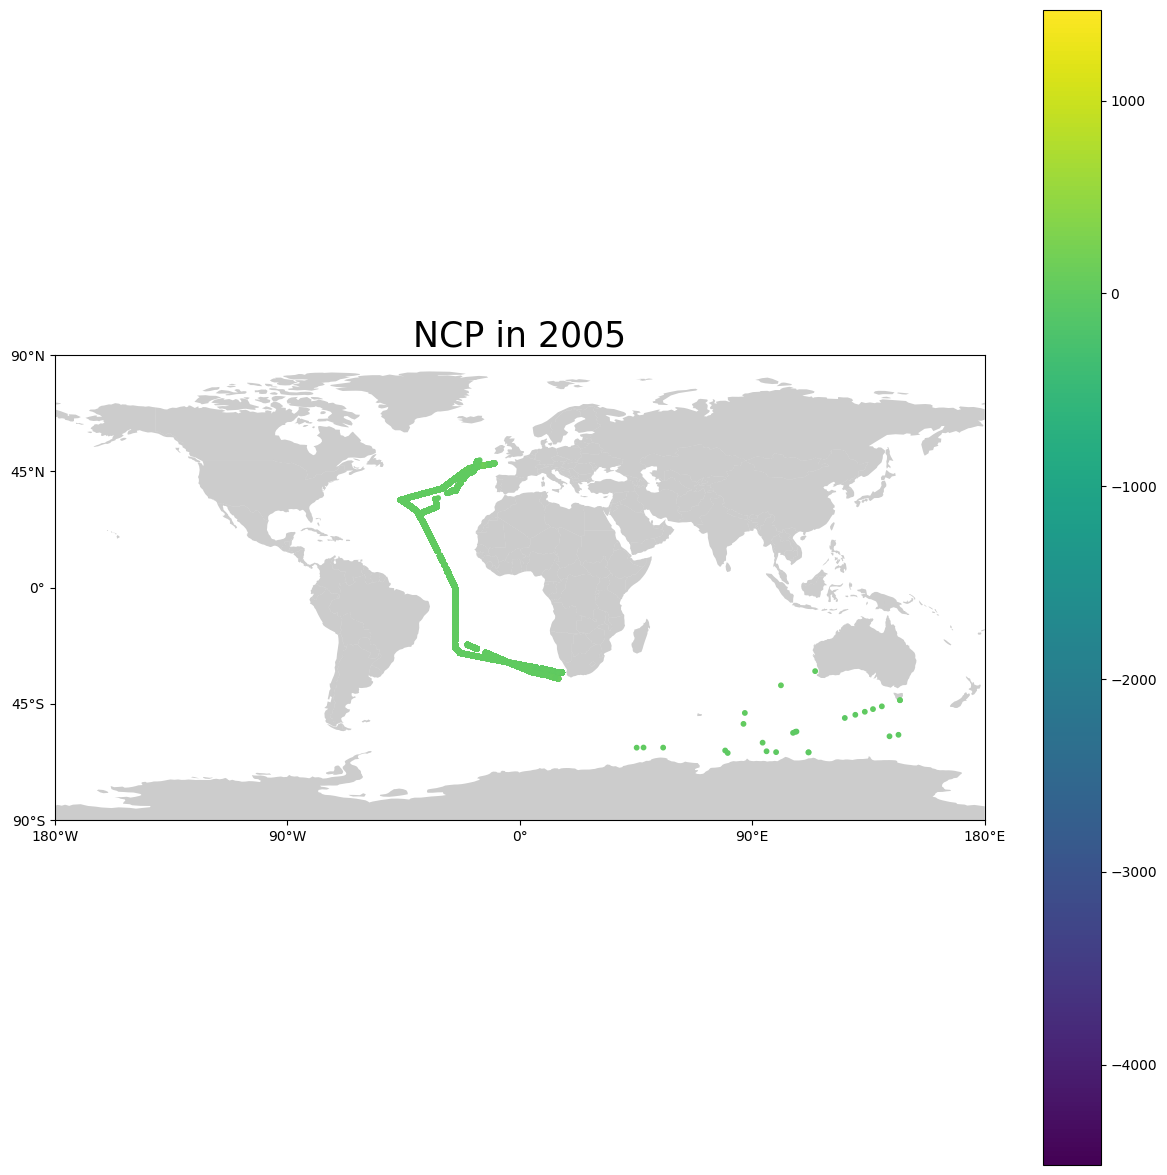

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame from your DataFrame
geometry = [Point(xy) for xy in zip(df_2005['Lon'], df_2005['Lat'])]
geo_df = gpd.GeoDataFrame(df_2005, geometry=geometry)

# Create a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='ncp', ax=ax, legend=True, markersize=10, vmin=-4520.9553, vmax=1470.5759)

# Set the y-axis limits
ax.set_ylim(-90, 90)

# Set the x-axis limits
ax.set_xlim(-180, 180)

# Set custom tick labels on the y-axis
ax.set_yticks([-90, -45, 0, 45, 90])
ax.set_yticklabels(['90°S', '45°S', '0°', '45°N', '90°N'])

# Set custom tick labels on the x-axis
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels(['180°W', '90°W', '0°', '90°E', '180°E'])
# set title
ax.set_title('NCP in 2005', fontsize=25)

plt.show()

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os

# Create a GeoDataFrame from the main DataFrame
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Create a folder to store the images
output_folder = 'output_images'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each year's DataFrame and create a separate plot
years = [1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009]

for year in years:
    # Filter the DataFrame for the current year
    df_year = df[df['Yr'] == year]
    
    # Create a GeoDataFrame for the current year
    geometry = [Point(xy) for xy in zip(df_year['Lon'], df_year['Lat'])]
    geo_df_year = gpd.GeoDataFrame(df_year, geometry=geometry)
    
    # Create a map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    fig, ax = plt.subplots(figsize=(15, 15))
    world.plot(ax=ax, alpha=0.4, color='grey')
    geo_df_year.plot(column='ncp', ax=ax, legend=True, markersize=10, vmin=-4520.9553, vmax=1470.5759)
    
    # Set the y-axis limits
    ax.set_ylim(-90, 90)
    
    # Set the x-axis limits
    ax.set_xlim(-180, 180)
    
    # Set custom tick labels on the y-axis
    ax.set_yticks([-90, -45, 0, 45, 90])
    ax.set_yticklabels(['90°S', '45°S', '0°', '45°N', '90°N'])
    
    # Set custom tick labels on the x-axis
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels(['180°W', '90°W', '0°', '90°E', '180°E'])
    
    # Set the plot title
    ax.set_title(f'Year {year} Map')
    
    # Save the figure as an image
    output_file = os.path.join(output_folder, f'year_{year}.png')
    plt.savefig(output_file, dpi=300)
    
    plt.close(fig)  # Close the figure to free up memory
    
print('Plots saved as images.')

/tmp/ipykernel_4038224/2140947405.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


Plots saved as images.


<AxesSubplot: title={'center': 'ncp distribution'}, ylabel='Frequency'>

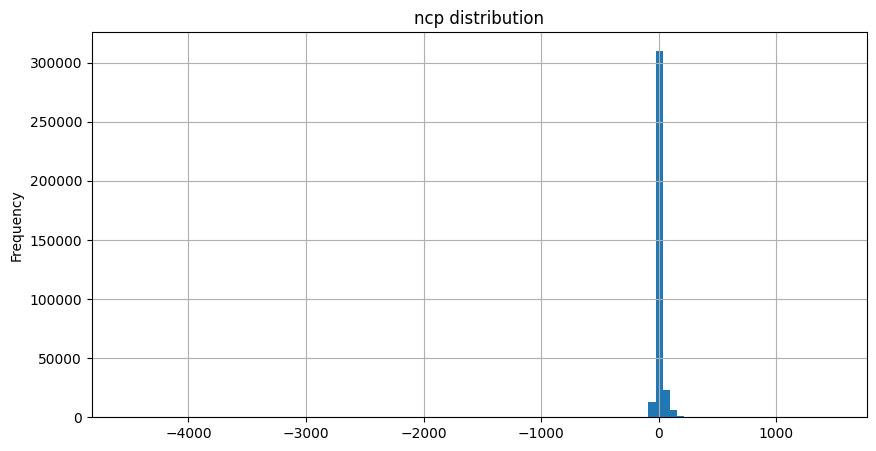

In [5]:
df['ncp'].plot(kind='hist', bins=100, figsize=(10, 5), grid=True, title='ncp distribution')

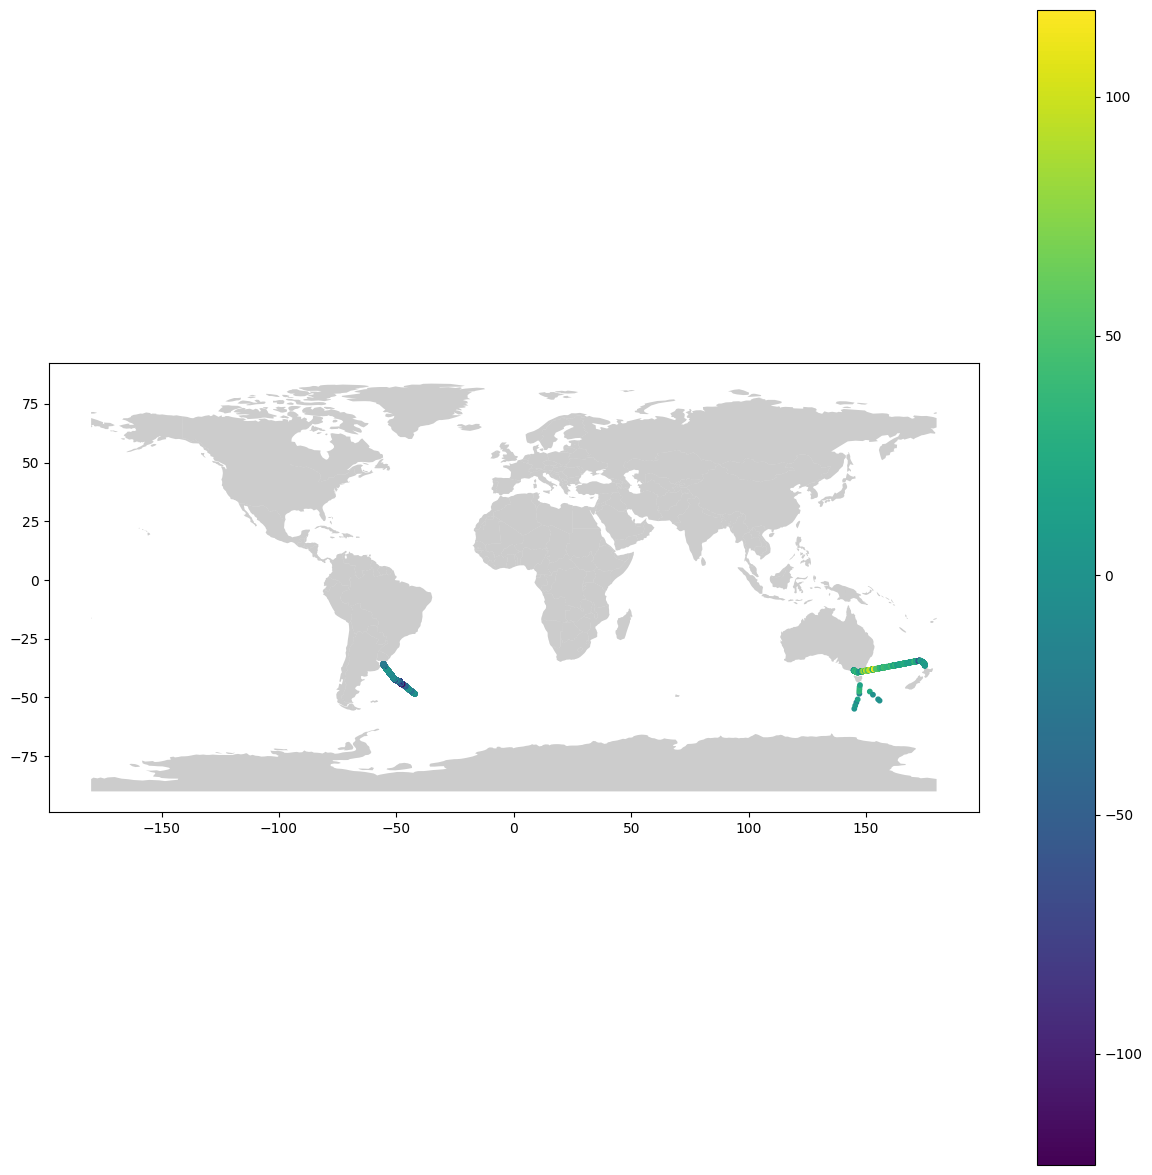

In [13]:
# Create a GeoDataFrame from your DataFrame
geometry = [Point(xy) for xy in zip(df_2008['Lon'], df_2008['Lat'])]
geo_df = gpd.GeoDataFrame(df_2008, geometry=geometry)
# Plot the data
fig, ax = plt.subplots(figsize=(15,15))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='ncp', ax=ax, legend=True, markersize=10)
plt.show()

In [16]:
# df.isnull().sum() ----no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355296 entries, 0 to 355295
Data columns (total 37 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   iso      355296 non-null  float64
 1   crsID    355296 non-null  int64  
 2   Lat      355296 non-null  float64
 3   Lon      355296 non-null  float64
 4   Yr       355296 non-null  int64  
 5   Mn       355296 non-null  int64  
 6   Dy       355296 non-null  int64  
 7   salt     355296 non-null  float64
 8   temp     355296 non-null  float64
 9   press    355296 non-null  float64
 10  o2ar     355296 non-null  float64
 11  neto2    355296 non-null  float64
 12  Lon70    355296 non-null  float64
 13  yrmn     355296 non-null  int64  
 14  jd       355296 non-null  float64
 15  wsi      355296 non-null  int64  
 16  wsj      355296 non-null  int64  
 17  yd       355296 non-null  int64  
 18  mli      355296 non-null  int64  
 19  mlj      355296 non-null  int64  
 20  ncp      353681 non-null  

In [8]:
## feature selection 

correlations = df.corr()
correlations['ncp'].sort_values(ascending=False)


/tmp/ipykernel_4038224/3283649385.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


ncp           1.000000
o2ar          0.743751
VGPM          0.323617
mlj           0.263485
Lon           0.260914
Unnamed: 0    0.253555
ID            0.241454
Rrs_555       0.233059
mli           0.227910
Lat           0.222282
wsj           0.221929
KD490         0.221422
PIC           0.215817
CHL           0.201553
POC           0.200887
Dy            0.172017
crsID         0.153942
wsi           0.106446
Rrs_670       0.091330
press         0.081451
Rrs_510       0.079895
PAR           0.078925
aot           0.052050
CbPM          0.035590
Lon70         0.029492
Yr            0.016306
yrmn          0.013203
jd           -0.004277
iso          -0.060787
yd           -0.064748
salt         -0.067774
Mn           -0.084232
Rrs_490      -0.118023
Rrs_412      -0.140444
Rrs_443      -0.147162
CDOM         -0.176555
neto2        -0.306786
temp         -0.306786
Name: ncp, dtype: float64

In [ ]:
# take the top 10 positively correlated variables and top 2 
# negatively correlated variables (based on absolute correlation)


In [9]:
# drop nans in target ncp
df_dropna = df.dropna(subset=['ncp'])

feature_columns = ['VGPM', 'mlj', 'Lon','Rrs_555', 'mli', 'Lat', 'wsj', 'KD490','PIC', 'temp','CHL','POC','neto2','wsi','crsID','Dy']
X = df_dropna[feature_columns]
y = df_dropna['ncp']

In [ ]:

# Normalization
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
# Standardization
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
######

In [9]:
# Drop nans in target ncp
df_dropna = df.dropna(subset=['ncp'])

# Specify the feature columns
feature_columns = ['VGPM', 'mlj', 'Lon','Rrs_555', 'mli', 'Lat', 'wsj', 'KD490','PIC', 'temp','CHL','POC','neto2','wsi','crsID','Dy']

# Prepare the features and target
X = df_dropna[feature_columns]
y = df_dropna['ncp']

# Convert to datetime
df_dropna['date'] = pd.to_datetime(df_dropna[['Yr', 'Mn', 'Dy']].rename(columns={'Yr': 'year', 'Mn': 'month', 'Dy': 'day'}))

# Now you can sort and split your data as before
df_dropna = df_dropna.sort_values('date')

# Define the cut-off point as the 80th percentile of the date
cut_off_point = int(len(df_dropna) * 0.8)

# Split your data into a training and test set
X_train = X.iloc[:cut_off_point]
y_train = y.iloc[:cut_off_point]

X_test = X.iloc[cut_off_point:]
y_test = y.iloc[cut_off_point:]

/tmp/ipykernel_3635884/111408977.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['date'] = pd.to_datetime(df_dropna[['Yr', 'Mn', 'Dy']].rename(columns={'Yr': 'year', 'Mn': 'month', 'Dy': 'day'}))


In [ ]:
######

In [2]:

df_dropna = df.dropna(subset=['ncp'])
# Specify the feature columns
feature_columns = ['VGPM', 'mlj', 'Lon', 'Rrs_555', 'mli', 'Lat', 'wsj', 'KD490', 'PIC', 'temp', 'CHL', 'POC', 'neto2', 'wsi', 'crsID', 'Dy']

# Prepare the features and target
X = df_dropna[feature_columns]
y = df_dropna['ncp']

# Calculate the indices for splitting the data
total_length = len(df_dropna)
train_end_index = int(total_length * 0.8)  # Ending index for the training set
test_start_index = int(total_length * 0.4)  # Starting index for the test set
test_end_index = int(total_length * 0.6)  # Ending index for the test set

# Split the data into training and test sets
train_set = df_dropna.iloc[:train_end_index]  # First 80%
test_set = df_dropna.iloc[test_start_index:test_end_index]  # Middle 20%

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [10]:
import statsmodels.formula.api as smf

# we need to join all feature names to be a string formula like "ncp ~ o2ar + VGPM + ..."
formula = "ncp ~ " + " + ".join(feature_columns)

# Create the model
model = smf.ols(formula, data=df_dropna)

# Fit the model
model.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ncp   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:46:43   Log-Likelihood:            -1.5833e+06
No. Observations:              353681   AIC:                         3.167e+06
Df Residuals:                  353665   BIC:                         3.167e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.8905      0.824    -25.361      0.000     -22.505     -19.276
VGPM           0.0089      0.000     56.572      0.000       0.009       0.009
mlj            0.4097      0.006     65.962      0.000       0.398       0.422
Lon            0.0155      0.003      5.223      0.000       0.010       0.021
Rrs_555     6483.0808    137.586     47.120      0.000    6213.416    6752.746
mli           -0.8621      0.012    -74.583      0.000      -0.885      -0.839
Lat            0.7738      0.007    105.130      0.000       0.759       0.788
wsj           -0.0403      0.002    -20.041      0.000      -0.044      -0.036
KD490         66.7017      3.517     18.963      0.000      59.808      73.596
PIC        -4474.3201    320.158    -13.975      0.000   -5101.820   -3846.820
temp          -0.5568      0.006    -96.904      0.000      -0.568      -0.546
CHL          -14.4898      0.460    -31.488      0.000     -15.392     -13.588
POC            0.0055      0.002      3.111      0.002       0.002       0.009
neto2         -0.5568      0.006    -96.904      0.000      -0.568      -0.546
wsi            0.0293      0.000    142.531      0.000       0.029       0.030
crsID          1.7476      0.015    116.859      0.000       1.718       1.777
Dy             0.1277      0.005     25.602      0.000       0.118       0.137
==============================================================================
Omnibus:                   887677.328   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     572602953392.038
Skew:                         -26.076   Prob(JB):                         0.00
Kurtosis:                    6236.204   Cond. No.                     6.39e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.2e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [3]:
# Extract the features and target from the train set
X_train = train_set[feature_columns]
y_train = train_set['ncp']

# Extract the features and target from the test set
X_test = test_set[feature_columns]
y_test = test_set['ncp']


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [11]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import r2_score
# Compute R-squared
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared score: {r2_rf:.2f}")

R-squared score: -1.02


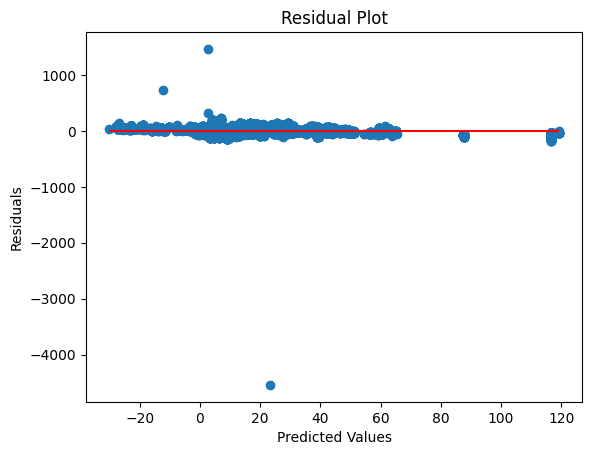

In [32]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot
plt.scatter(y_pred_rf, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), color='red') # A horizontal line at y=0
plt.show()

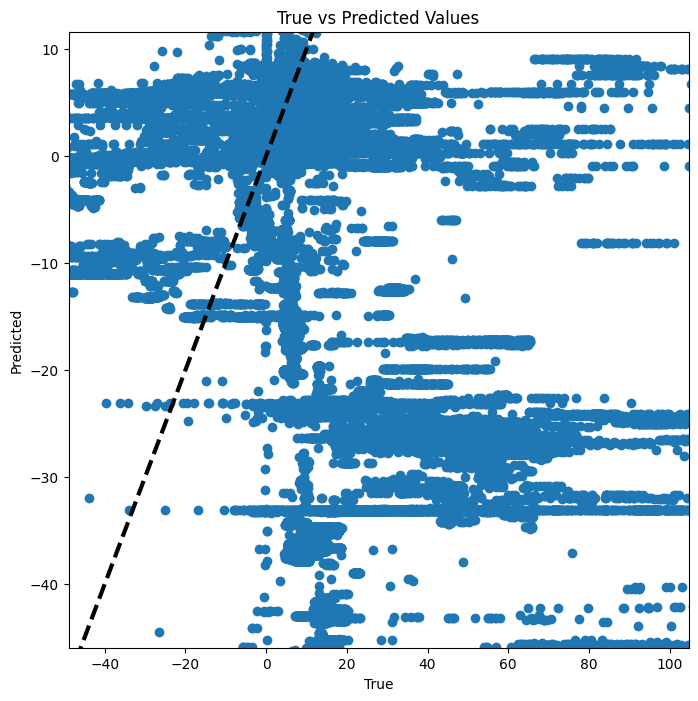

In [12]:
import numpy as np
# Calculate the limits for the x-axis and y-axis
x_limit = np.percentile(y_test, [2.5, 97.5])
y_limit = np.percentile(y_pred_rf, [2.5, 97.5])

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values')

# Set the limits for the x-axis and y-axis
plt.xlim(x_limit[0], x_limit[1])
plt.ylim(y_limit[0], y_limit[1])

plt.show()

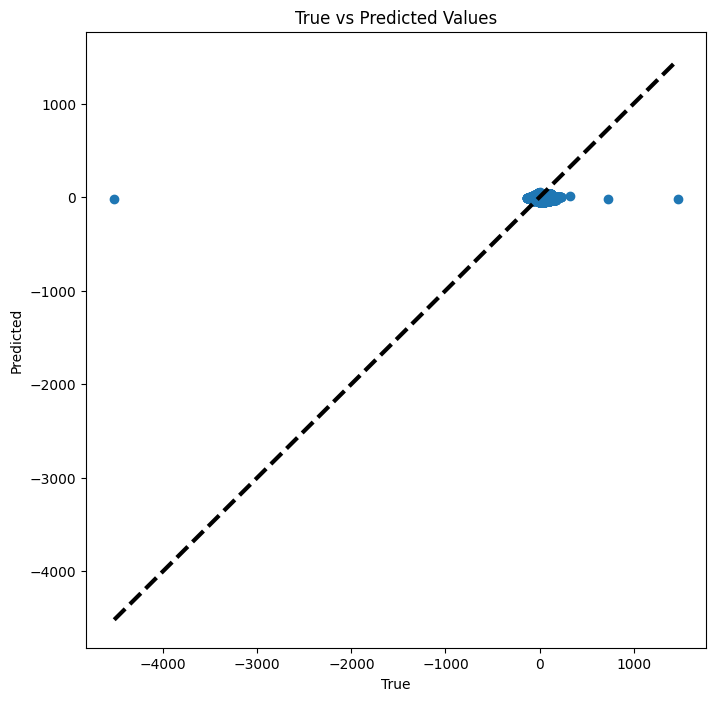

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values')
plt.show()


In [ ]:
rf_model

In [26]:
from joblib import dump

dump(rf_model, 'random_forest_model.joblib') 

# from joblib import load

# rf_model = load('random_forest_model.joblib') 


['random_forest_model.joblib']

In [7]:
# Feature importances
importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'feature': feature_columns, 'importance': importances})
importances_df.sort_values(by='importance', ascending=False, inplace=True)
print(importances_df)

    feature  importance
0      o2ar    0.743222
7       Lat    0.116527
8       wsj    0.042225
4        ID    0.034754
11    neto2    0.018925
10     temp    0.018249
3       Lon    0.015906
5   Rrs_555    0.003280
9     KD490    0.003274
1      VGPM    0.001625
2       mlj    0.001465
6       mli    0.000547


In [17]:
from sklearn.inspection import plot_partial_dependence


# features = ['o2ar']

# plot_partial_dependence(rf_model, X_train, features)
# plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/inspection/__init__.py)

In [4]:
# read X_train
import pickle
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

In [ ]:
import shap

# Create a Tree explainer to explain the output of the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


In [ ]:
# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train)


In [ ]:
from sklearn.tree import export_graphviz
import pydot

# # Pull out one tree from the forest
# tree = rf_model.estimators_[5]

# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')


In [ ]:
from sklearn.tree import plot_tree

# Extract a single tree
single_tree = rf_model.estimators_[0]

# Create a plot
plt.figure(figsize=(20,20))

# Plot a single tree from the random forest
plot_tree(single_tree, 
          filled=True, 
          rounded=True, 
          max_depth=2) # Limit depth to make the plot readable. You might need to adjust this.

plt.show()
